<h1><center>Data Analysis</center></h1>
<h2><center>Homewrok: Neural Networks 2</center></h2>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RND_SEED = 7
np.random.seed(RND_SEED)

%matplotlib inline

# Intro

For this homework you are propossed to 
1. implement autoencoder model based on Keras library using MNIST sample.
2. set up your own dataset for transfer learning and apply pretrained model

# Autoencoders


Idea of autoencoders is illustrated in the following figure:

Autoencoder consists of two parts: encoder and decoder.
Encoder takes an image and encodes it into another image or vector with smaller size. In other words, it compresses the image. On the other hand, decoder takes the compressed image and reconstructs the original image. If the autoencoder is designed and fitted properly, the original and reconstructed images will be similar. 

# Fully-connected Autoencoder

Consider an autoencoder which consists only fully-connected layers (no convolutions, no pooling et al.) as it is show in figure:

This autoencoder takes an image as a vector and encodes it into a vector of smaller size. Its output is a reconstructed image represented as a vector of the same size as the input. 

## Task 1 (1 point)

Download and read MNIST sample. Plot several images. Do all preprocessing steps needed for the autoencoder.

Hint: use `from tensorflow.keras.datasets import mnist`

In [61]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import MeanSquaredError

In [62]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

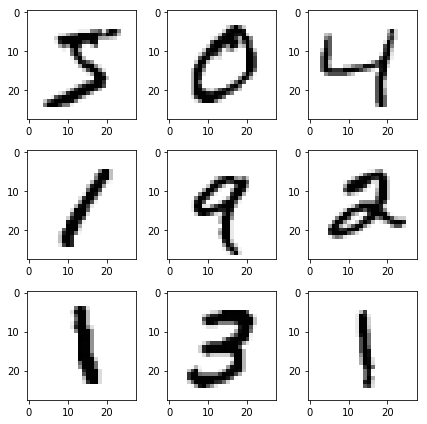

In [63]:
plt.figure(figsize=(6,6))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
plt.show()

In [64]:
# Scale X
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
y_train_hot = to_categorical(y_train, n_classes)
y_test_hot = to_categorical(y_test, n_classes)

## Task 2 (3 points)

Implement your autoencoder using Keras library with the following structure:
- **Encoder** has one fully-connected layer, that compresses an input image into a vector of size 49.
- **Decoder** has one fully-connected layer, that reconstructs the original image. 

Fit your autoencoder during 5 epochs. Use **mse** error function.

Hint: see Keras examples from your seminars.

In [80]:
n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

X_train_nn = X_train.reshape((n_train, -1, ))
X_test_nn = X_test.reshape((n_test, -1, ))

print('X_train:    ', X_train.shape)
print('X_train_nn: ', X_train_nn.shape)

X_train:     (60000, 28, 28)
X_train_nn:  (60000, 784)


In [81]:
model = Sequential()

# as wanted - these shape
model.add(Dense(units=49, activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))

# as wanted - MSE
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[MeanSquaredError()])

In [82]:
# as wanted - 5 epochs
model.fit(X_train_nn,
          X_train_nn,
          batch_size=32,
          epochs=5,
          validation_data=(X_test_nn, X_test_nn))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1465 - mean_squared_error: 0.0269 - val_loss: 0.0981 - val_mean_squared_error: 0.0113
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0898 - mean_squared_error: 0.0088 - val_loss: 0.0831 - val_mean_squared_error: 0.0069
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0826 - mean_squared_error: 0.0067 - val_loss: 0.0806 - val_mean_squared_error: 0.0061
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0811 - mean_squared_error: 0.0062 - val_loss: 0.0797 - val_mean_squared_error: 0.0059
Epoch 5/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0805 - mean_squared_error: 0.0061 - val_loss: 0.0794 - val_mean_squared_error: 0.0058


## Task 3 (1 point)

Test your autoencoder. Calculate MSE error between inputs and outputs of the autoencoder. Plot several input and output images. Are they similar? 

In [83]:
y_test_pred_probas = model.predict_proba(X_test_nn)
y_test_pred_classes = model.predict_classes(X_test_nn)

x_decoded = model.predict(X_test_nn)
print('MSE value: ' + f'{MeanSquaredError()(X_test_nn, x_decoded).numpy()}')

MSE value: 0.0057927388697862625


In [78]:
# Predicted probas for 2 images
#y_test_pred_probas[:2]

array([[-2.385022 , -1.5738755, -2.40295  , ..., -2.0920653, -3.3651795,
        -2.1546617],
       [-2.115947 , -1.7342091, -2.549343 , ..., -2.408703 , -4.327458 ,
        -2.9947517]], dtype=float32)

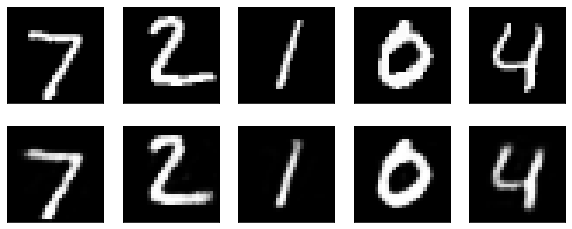

In [84]:
n = 5
plt.figure(figsize=(n*2, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

---

# Transfer Learning

In this task you should construct your own dataset to perform classification or regression task.
For instance you can
* Predict age (age group) given face image
* Classify different types of vehicles on the image
* Classify smartphone models
* [Your Idea Here]

## Task 4 (3 points)

Construct your dataset
* It should be you handmade raw dataset (not loaded completely in the web by someone else)
* It should contain at least 500 images (the more - the better)
* Once collected it should be downloadable via `wget` command in terminal (if you have windows you can check it in Google Collab) - for instance use dropbox or Yandex.Disk to get the link

Helpful links: [1](https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/), [2](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)

In [95]:
%pip install wldhx.yadisk-direct

Note: you may need to restart the kernel to use updated packages.


In [110]:
data = !wget --no-check-certificate 'https://drive.google.com/open?id=16M6612JaTMbmEmZBGxm4CGsKr22ulrCs'

data

['"wget" \xadҐ пў«пҐвбп ў\xadгваҐ\xad\xadҐ© Ё«Ё ў\xadҐи\xadҐ©',
 'Є®¬\xa0\xad¤®©, ЁбЇ®«\xadпҐ¬®© Їа®Ја\xa0¬¬®© Ё«Ё Ї\xa0ЄҐв\xadл¬ д\xa0©«®¬.']

## Task 5 (1 point)

Prepare your dataset to be put through your model

* Resize and normalize images
* Split data in train and validation sets
* Prepare data generator with image augmentation for training set

In [ ]:
# Your code is here

## Task 5 (1 point)

* Use any pretrained model and replace dence layers
* Freeze (make untrainable) all weight except for dence layers weights and train your model
* Report train and validation losses
* Unfreeze other weights, report train validation losses

In [ ]:
# Your code is here